In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

In [2]:
# This notebook creates node-to-node weak scaling plots for OpenSn.

# The systems data structure contains experimental timings and other basic system information.
# For each system, the following fields are required:
#
# label:                Name and short description of the system. Used in the plot legend.
# nodes:                List of nodes that correspond to experimental timing results.
# experimental_timings: Sweep time values produced by OpenSn for the weak scaing input
#                       run on the specified number of nodes.
systems = {
    "dane": {
        # LLNL Dane - 112 Intel Sapphire Rapids cores/node, 105MB cache/CPU, 2.28GB DDR5 per core
        "label": "LLNL Dane (64 rpn)",
        "nodes": [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
        "experiment_timings": {
            "2024-10-29": [28.82, 30.47, 32.22, 32.66, 32.75, 34.27, 34.86, 34.17, 35.80, 40.36],
            # Add additional experimental data here
        }
    },
    # Add additional systems here
}

# Select system to plot. Leave empty to plot all systems.
system_to_plot = ""

# Plot subtitle
subtitle = "~256 cells/rank, 448 angles, 64 groups, single-groupset, single-angle aggregation"

# Save plot? 
save_plot = False
save_filename = "opensn-weak-scaling.png"

# DO NOT EDIT ANYTHING BELOW THIS CELL

In [3]:
# Compute parallel efficiency for all systems and datasets
# Efficiency is computed relative to the first value of each experimental timings dataset
for system_name, system_data in systems.items():
    nodes = system_data["nodes"]
    experiment_timings = system_data["experiment_timings"]
    
    efficiencies = {}
    for date, times in experiment_timings.items():
        base_time = times[0]
        efficiency = [base_time / time * 100.0 for time in times]
        efficiencies[date] = efficiency
        
    system_data["efficiency"] = efficiencies
    
# Colors and markers
colors = plt.cm.tab20.colors
markers = ['o', 's', 'd', '^', 'v', 'P', '*', 'X', 'D', 'h']
color_cycle = itertools.cycle(colors)
marker_cycle = itertools.cycle(markers)

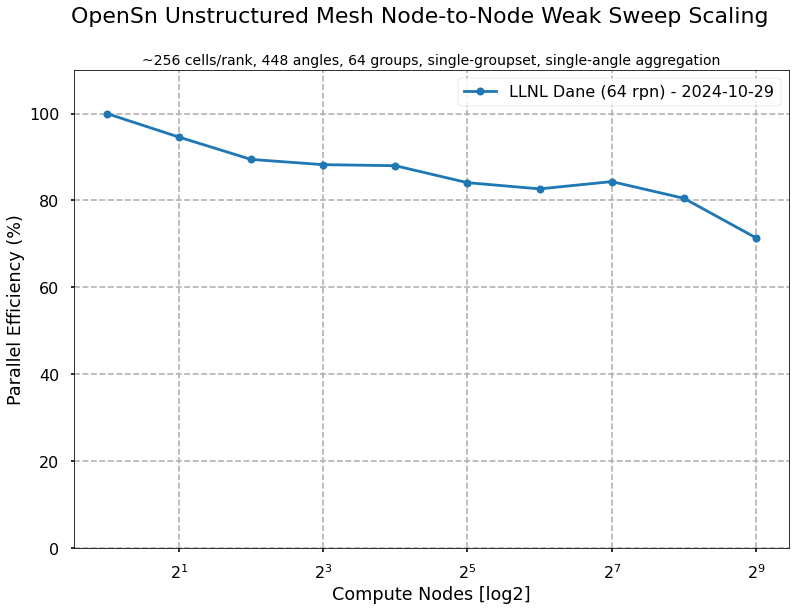

In [4]:
# Format plot
plt.style.use('seaborn-poster')
plt.suptitle("OpenSn Unstructured Mesh Node-to-Node Weak Sweep Scaling", fontsize=22)
plt.title(subtitle, fontsize=14)
plt.grid(linestyle='--')
plt.xlabel('Compute Nodes [log2]');
plt.xscale('log', base=2)
plt.ylim(0, 110)
plt.ylabel('Parallel Efficiency (%)');

if system_to_plot in systems:
    systems_to_plot = {system_to_plot: systems[system_to_plot]}
else:
    systems_to_plot = systems

# Plot experimental timings for selected systems
for system_name, system_data in systems_to_plot.items():
    label = system_data["label"]
    nodes = system_data["nodes"]
   
    for date, values in system_data["efficiency"].items():
        color = next(color_cycle)
        marker = next(marker_cycle)
        
        plt.plot(
            nodes,
            values,
            marker=marker,
            markersize=8,
            markerfacecolor=color,
            color=color,
            label=f'{label} - {date}'
        )

plt.legend()

if save_plot:
    plt.savefig(save_filename)